In [23]:
from tensorflow.keras.datasets import mnist

In [24]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print('학습셋 이미지 수 : %d개' %(X_train.shape[0]))
print('테스트셋 이미지 수 : %d개' % (X_test.shape[0]))

학습셋 이미지 수 : 60000개
테스트셋 이미지 수 : 10000개


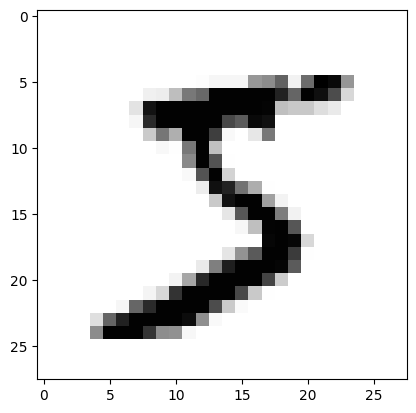

In [4]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [6]:
import sys
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%-3s' % i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [7]:
X_train.shape[0]

60000

In [25]:
X_train = X_train.reshape(X_train.shape[0], 784).astype('float64') / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [10]:
print('class : %d' % (y_train[0]))

class : 5


In [26]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test,10)

In [13]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(512, input_dim = 784, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam',
              metrics=['accuracy'])

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

modelpath = ".MNIST_MLP.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                             verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [19]:
history = model.fit(X_train, y_train, validation_split = 0.25, epochs=30,
                    batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])

print('\n Test Accuracy: %.4f'  % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.18408, saving model to .MNIST_MLP.keras

Epoch 2: val_loss improved from 0.18408 to 0.13588, saving model to .MNIST_MLP.keras

Epoch 3: val_loss improved from 0.13588 to 0.11407, saving model to .MNIST_MLP.keras

Epoch 4: val_loss improved from 0.11407 to 0.09901, saving model to .MNIST_MLP.keras

Epoch 5: val_loss improved from 0.09901 to 0.09196, saving model to .MNIST_MLP.keras

Epoch 6: val_loss improved from 0.09196 to 0.09120, saving model to .MNIST_MLP.keras

Epoch 7: val_loss improved from 0.09120 to 0.08277, saving model to .MNIST_MLP.keras

Epoch 8: val_loss did not improve from 0.08277

Epoch 9: val_loss did not improve from 0.08277

Epoch 10: val_loss improved from 0.08277 to 0.08171, saving model to .MNIST_MLP.keras

Epoch 11: val_loss did not improve from 0.08171

Epoch 12: val_loss improved from 0.08171 to 0.07908, saving model to .MNIST_MLP.keras

Epoch 13: val_loss did not improve from 0.07908

Epoch 14: val_loss did not improv

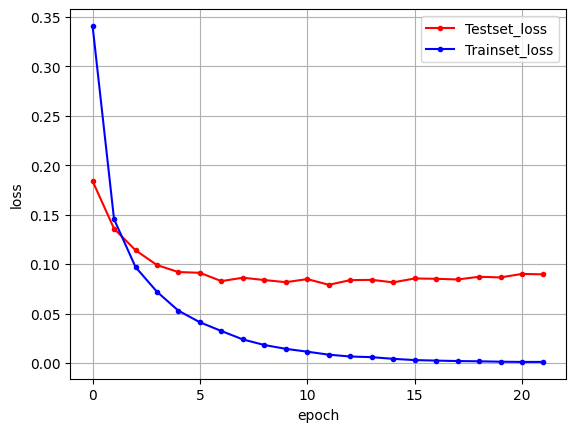

In [21]:
import matplotlib.pyplot as plt
import numpy as np
y_vloss = history.history['val_loss']

y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c ='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.',c='blue', label='Trainset_loss')


plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [5]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28,28,1).astype('float64') / 255

X_test = X_test.reshape(X_test.shape[0], 28,28,1).astype('float64') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
# 컨볼루션 신경망 설정
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])




In [8]:
modelpath = './MINST_CNN.keras'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [9]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30,
                    batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])

print('\n Test Accuracy : %.4f' % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.08346, saving model to ./MINST_CNN.keras

Epoch 2: val_loss improved from 0.08346 to 0.05577, saving model to ./MINST_CNN.keras

Epoch 3: val_loss improved from 0.05577 to 0.04658, saving model to ./MINST_CNN.keras

Epoch 4: val_loss improved from 0.04658 to 0.04470, saving model to ./MINST_CNN.keras

Epoch 5: val_loss improved from 0.04470 to 0.04087, saving model to ./MINST_CNN.keras

Epoch 6: val_loss did not improve from 0.04087

Epoch 7: val_loss improved from 0.04087 to 0.03992, saving model to ./MINST_CNN.keras


KeyboardInterrupt: 

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
y_vloss = history.history['val_loss']

y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c ='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.',c='blue', label='Trainset_loss')


plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()